In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'

In [4]:
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_train__, x_valid__, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [6]:
x_train_ = x_train__.reshape(x_train__.shape + (1,))
x_valid_ = x_valid__.reshape(x_valid__.shape + (1,))
x_test = x_test_.reshape(x_test_.shape + (1,))

In [7]:
x_train = np.zeros((x_train_.shape[0], x_train_.shape[1], x_train_.shape[2], 3))
x_valid = np.zeros((x_valid_.shape[0], x_valid_.shape[1], x_valid_.shape[2], 3))

In [8]:
x_train[:,:,:,0] = x_train_[:,:,:,0]
x_train[:,:,:,1] = x_train_[:,:,:,0]
x_train[:,:,:,2] = x_train_[:,:,:,0]

x_valid[:,:,:,0] = x_valid_[:,:,:,0]
x_valid[:,:,:,1] = x_valid_[:,:,:,0]
x_valid[:,:,:,2] = x_valid_[:,:,:,0]

In [12]:
print(x_train.shape)
print(x_valid.shape)

(54000, 28, 28, 3)
(6000, 28, 28, 3)


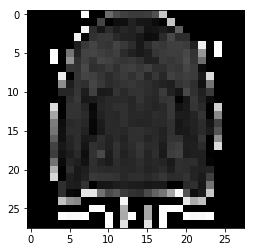

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_valid[54,:,:,:])
plt.show()

In [14]:
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)
y_test_categorical = to_categorical(y_test[:,0])

Using TensorFlow backend.


In [63]:
import keras.applications as applications
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

#base_model = applications.ResNet50(weights='imagenet', 
#                                   include_top=False,
#                                  input_shape = (28, 28, 3))
#base_model = applications.VGG19(include_top=False, 
#                                weights='imagenet', 
#                                input_shape = (28, 28, 3) )
base_model = applications.inception_v3.InceptionV3(include_top=False, 
                                weights='imagenet', 
                                input_shape = (28, 28, 3) )

ValueError: Input size must be at least 139x139; got `input_shape=(28, 28, 3)`

In [56]:
#from keras.layers.core import Dense, GlobalAveragePooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, MaxPool2D
from keras.models import Model
from keras import backend as K
K.set_image_dim_ordering('tf')

x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

from keras import optimizers
adam = optimizers.Adam(lr=0.000001, decay=0.0000) #decay=1e-4
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: The shape of the input to "Flatten" is not fully defined (got (None, None, 512). Make sure to pass a complete "input_shape" or "batch_input_shape" argument to the first layer in your model.

In [54]:
#model.summary()

In [55]:
from keras.callbacks import ModelCheckpoint 
from fnn_helper import PlotLosses
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn-resnet.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=256, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )

Train on 54000 samples, validate on 6000 samples
Begin training
Epoch 1/500
 1280/54000 [..............................] - ETA: 10:04 - loss: 2.3026 - acc: 0.1039

KeyboardInterrupt: 